In [42]:
import glob
import pandas as pd
#outputs = []
#RagOverArXiv/data/pdfs_ws_mrkp_test/eval_outputs
pdf_files = glob.glob("../data/pdfs_ws_mrkp_test/eval_outputs/pdf*.csv")
txt_files = glob.glob("../data/pdfs_ws_mrkp_test/eval_outputs/txt*.csv")
all_files = pdf_files+txt_files
result = pd.DataFrame()#index=list(all_files.index))
for file_path in all_files:
    print(file_path)
    output = pd.read_csv(file_path)
    print(output.shape)
    output["settings"] = file_path.split('/')[-1]
    result = pd.concat([result,output])
print(result.shape)
pd.set_option('display.max_colwidth',500)
result[['eval_score','settings']].head(25)

../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
(3, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(5, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(7, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
(7, 15)
(22, 16)


,eval_score,settings
0,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
1,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
2,4.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
0,5.0,pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
1,1.0,pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
2,5.0,pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
3,5.0,pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
4,5.0,pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
0,5.0,txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
1,4.0,txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv


In [25]:
print(result['eval_score'].unique())

[ 5.  4.  1. nan]


In [28]:
result.shape

(22, 16)

In [29]:
import numpy as np
result["eval_score"] = result["eval_score"].apply(
    lambda x: x if not pd.isna(x) else 1
)
result["eval_score"] = (result["eval_score"] - 1) / 4

In [30]:
result.eval_score.head(10)

0    1.00
1    1.00
2    0.75
0    1.00
1    0.00
2    1.00
3    1.00
4    1.00
0    1.00
1    0.75
Name: eval_score, dtype: float64

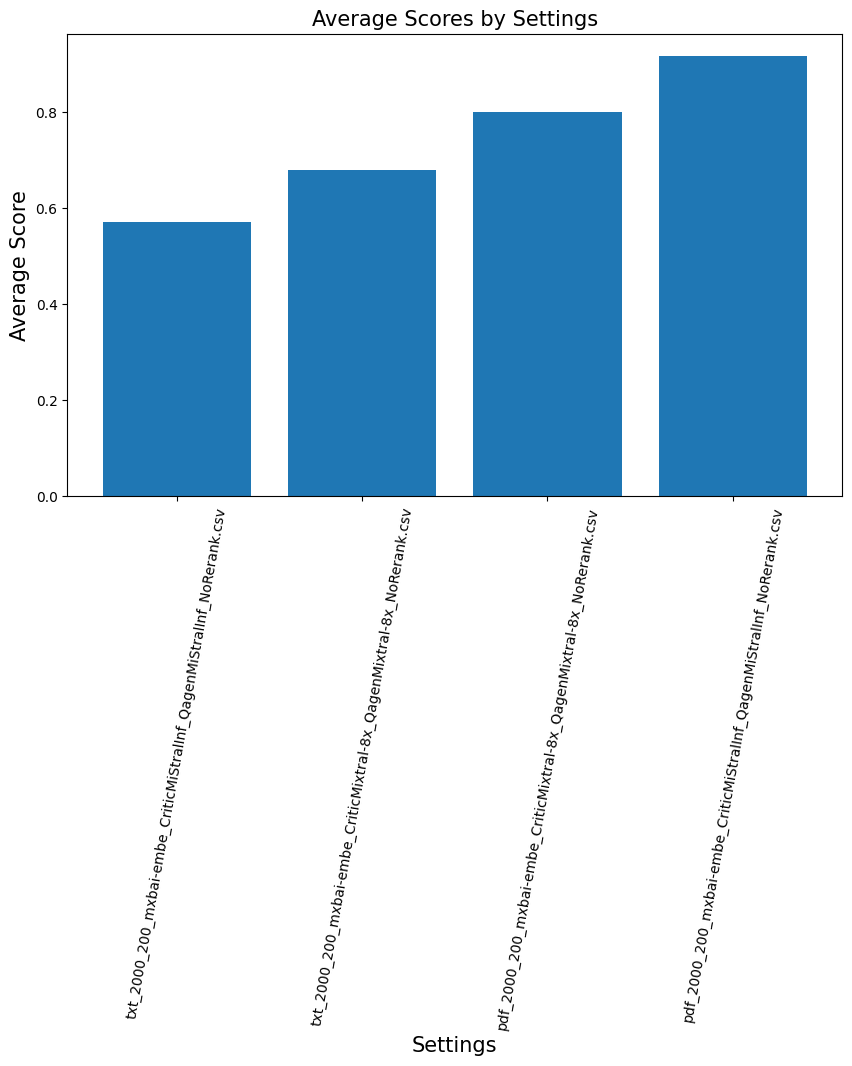

In [41]:
import matplotlib.pyplot as plt

# Calculate the average scores and sort them
average_scores = result.groupby("settings")["eval_score"].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_scores.index, average_scores.values)

# Set the plot title and labels
plt.title("Average Scores by Settings", fontsize=15)
plt.xlabel("Settings", fontsize=15)
plt.ylabel("Average Score", fontsize=15)

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=80)

# Show the plot
plt.show()

In [33]:
# Add a new column 'id' that contains a unique identifier for each row
result['id'] = range(len(result))

# Create the eval_scores Series
eval_scores = pd.Series(result["eval_score"].values, index=result["id"])

False
22


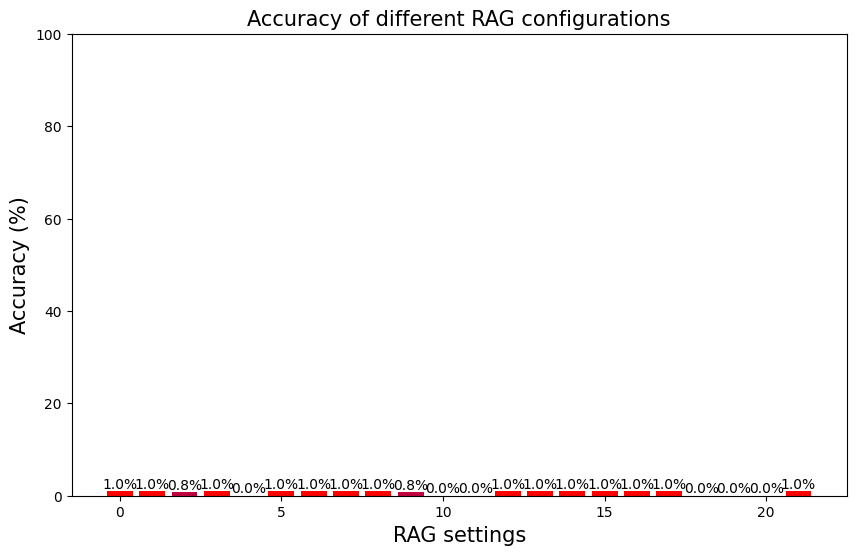

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from datasets import load_dataset

# Load the dataset
# Add a new column 'id' that contains a unique identifier for each row
result['id'] = range(len(result))

# Create the eval_scores Series
eval_scores = pd.Series(result["eval_score"].values, index=result["id"])
#eval_scores = pd.Series(eval_scores["eval_score"], index=eval_scores["settings"])
eval_scores.head()
print(eval_scores.isna().any())
#eval_scores = eval_scores.dropna()
eval_scores = eval_scores.fillna(0)
print(len(eval_scores))
# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("bluered", ["blue", "red"])

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(eval_scores.index, eval_scores.values, color=cmap(eval_scores.values / eval_scores.values.max()))

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

# Set the plot title and labels
plt.title("Accuracy of different RAG configurations", fontsize=15)
plt.xlabel("RAG settings", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Set the y-axis range
plt.ylim(0, 100)

# Show the plot
plt.show()